# Lab - Week 3

If you are already familiar with Python or prefer to use Python for some other reason, we recommend that you transfer the example given in the Mathematica notebook to this Jupyter notebook and then continue the experiments here. 

This should be straight forward: While Python does not offer symbolic mathematics out of the box (and even with additional libraries only to a very limited degree), it offers very good scientific compute capabilities and visualisation in standard libraries. 

The most important package for scientific computation in Python is [SciPy](https://scipy.org/). This can be consdiered as part of a standard Python implementation.

Simple ODE solving is very straight forward to implement. We will show you an example here, following the scipy documentation. You can view the source (uncommented) directly at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

To solve ODEs in Python we need to import the solve from scipy.

In [3]:
from scipy.integrate import odeint

We also need the NumPy package, which is the basis of all numeric comptuation.

In [5]:
import numpy as np

In the following example, we are solving the ODE system for a pendulum
$$
\begin{array}{lcl}
\frac{d\theta}{dt}& = & \omega\\
\frac{d\omega}{dt}& = & -b \omega - c\cdot sin(\theta)
\end{array}
$$

In [5]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

Set the parameters

In [8]:
b = 0.25
c = 5.0

Set the inital conditions

In [10]:
y0 = [np.pi - 0.1, 0.0]

Generate an array of test points at which you want to evaluate the system

In [12]:
t = np.linspace(0, 10, 101)

And simply tell scipy to solve it by forward integration

In [19]:
sol = odeint(pend, y0, t, args=(b, c))

We can then use the standard plotting library Matplotlib to plot the result:

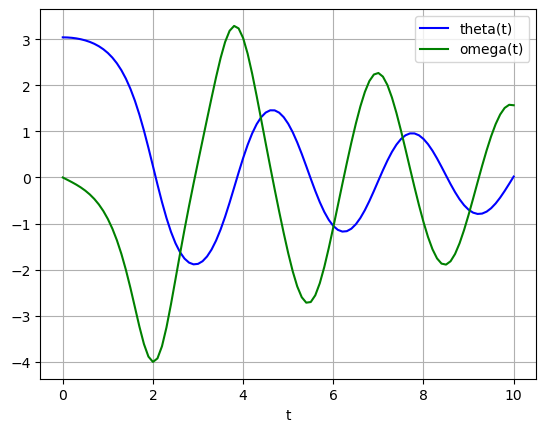

In [24]:
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

Equipped with the coding knowledge from this example, it should now be very easy for you to reconstruct the example given in the lecture and elbaorated on in the Mathematica notebook and conduct the same experiments in Python.

In [ ]:
# Task 2.1

In [163]:
# define f function
def f(x, k = 0,u=2):
    f = (k + x) ** u
    return f

In [165]:
# define pheromone function 
def pher(c, t, l1, l2, p):
    c1, c2 = c
    f_c1 = f(c1)
    f_c2 = f(c2) 
    total_f = f_c1 + f_c2

    dc1_dt = (1/l1) * (f_c1 / total_f) - p * c1
    dc2_dt = (1/l2) * (f_c2 / total_f) - p * c2

    return [dc1_dt,dc2_dt]

In [167]:
# set parameter
l1 = 2
l2 = 3
p = 0.05 

# set initial condition 
c0 = [1,1]

# time range between 0-10 for 101 times
t = np.linspace(0, 1000, 1000)

In [169]:
sol = odeint(pher, c0, t, args=(l1,l2,p))

In [171]:
# Extract solutions
c1_sol = sol[:, 0]
c2_sol = sol[:, 1]

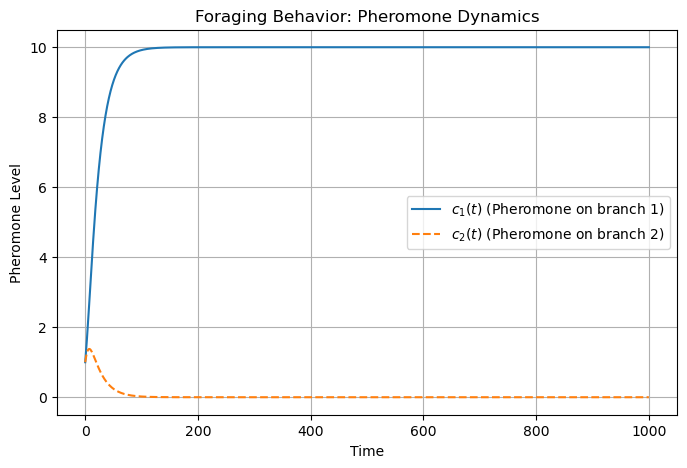

In [173]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(t, c1_sol, label=r'$c_1(t)$ (Pheromone on branch 1)')
plt.plot(t, c2_sol, label=r'$c_2(t)$ (Pheromone on branch 2)', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Pheromone Level')
plt.title('Foraging Behavior: Pheromone Dynamics')
plt.legend()
plt.grid()
plt.show()